# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MachineLearningSubmission/Dataset_clustering.csv')

data.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD802020,CUS654,B2C,Riesling,Alcoholic Beverages,4.19,3.0,0.0,12.57,Thüringen,2022-09-03,1
1,ORD2412242,CUS7325,B2C,Krombacher,Alcoholic Beverages,1.63,8.0,0.0,13.04,Berlin,2023-12-14,1
2,ORD2958854,CUS2033,B2C,Vio Wasser,Water,1.61,12.0,0.0,19.32,Baden-Württemberg,2021-11-19,1
3,ORD667592,CUS5004,B2C,Monster,Soft Drinks,3.21,14.0,0.0,44.94,Nordrhein-Westfalen,2022-04-04,1
4,ORD59826,CUS6292,B2C,Apollinaris,Water,0.93,1.0,0.0,0.93,Bremen,2021-11-06,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

saya menggunakan 2 algoritma klasifikasi, Random Forest dan XGBoost maka disini saya akan pisahkan splitting data antara Random Forest dan XGBoost.

### a. Random Forest

In [6]:
data_rf = data.copy() #rf untuk Random Forest

# Drop kolom yang tidak berhubungan dengan proses prediksi
data_rf = data_rf.drop(columns=['Order_ID','Customer_ID','Order_Date'])

# Cek data
data_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75195 entries, 0 to 75194
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  75195 non-null  object 
 1   Product        75195 non-null  object 
 2   Category       75195 non-null  object 
 3   Unit_Price     75195 non-null  float64
 4   Quantity       75195 non-null  float64
 5   Discount       75195 non-null  float64
 6   Total_Price    75195 non-null  float64
 7   Region         75195 non-null  object 
 8   Cluster        75195 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 5.2+ MB


In [7]:
# Encode kolom kategorikal
categorical_cols = data_rf.select_dtypes(include="object").columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_rf[col] = le.fit_transform(data_rf[col])
    label_encoders[col] = le

In [8]:
# Pisahkan fitur (X) dan target (y)
X = data_rf.drop(columns=['Cluster'])
y = data_rf['Cluster']

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,1,26,0,4.19,3.0,0.0,12.57,15
1,1,15,0,1.63,8.0,0.0,13.04,2
2,1,35,3,1.61,12.0,0.0,19.32,0
3,1,20,2,3.21,14.0,0.0,44.94,9
4,1,0,3,0.93,1.0,0.0,0.93,4


In [9]:
# Split data train-test
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# memastikan splitting data bekerja
print(f"Training set shape: X_train={X_train_rf.shape}, y_train={y_train_rf.shape}")
print(f"Test set shape: X_test={X_test_rf.shape}, y_test={y_test_rf.shape}")

Training set shape: X_train=(60156, 8), y_train=(60156,)
Test set shape: X_test=(15039, 8), y_test=(15039,)


### b. XGBoost

In [10]:
data_xgb = data.copy() #xgb untuk XGBoost

# Drop kolom yang tidak berhubungan dengan proses prediksi
data_xgb = data.drop(columns=["Order_ID", "Customer_ID", "Order_Date"])

# cek data
data_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75195 entries, 0 to 75194
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  75195 non-null  object 
 1   Product        75195 non-null  object 
 2   Category       75195 non-null  object 
 3   Unit_Price     75195 non-null  float64
 4   Quantity       75195 non-null  float64
 5   Discount       75195 non-null  float64
 6   Total_Price    75195 non-null  float64
 7   Region         75195 non-null  object 
 8   Cluster        75195 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 5.2+ MB


In [11]:
# Encode kolom kategorikal
categorical_cols = data_xgb.select_dtypes(include="object").columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_xgb[col] = le.fit_transform(data_xgb[col])
    label_encoders[col] = le

In [12]:
# Split fitur dan target
X = data_xgb.drop(columns=["Cluster"])
y = data_xgb["Cluster"]

In [13]:
# Split data train-test
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)

# memastikan splitting data bekerja
print(f"Training set shape: X_train={X_train_xgb.shape}, y_train={y_train_xgb.shape}")
print(f"Test set shape: X_test={X_test_xgb.shape}, y_test={y_test_xgb.shape}")

Training set shape: X_train=(60156, 8), y_train=(60156,)
Test set shape: X_test=(15039, 8), y_test=(15039,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [14]:
# Latih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)


RandomForestClassifier(random_state=42)

In [15]:
# Latih model XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

**1. Random Forest**:
 algoritma bentuk ensemble yang menggabungkan hasil dari beberapa pohon keputusan (decision trees) untuk meningkatkan akurasi dan stabilitas prediksi.

 - **Cara kerja:** Random Forest membangun banyak pohon keputusan secara acak dari subset data dan fitur, kemudian menggabungkan hasilnya melalui voting atau rata-rata
 - **Kelebihan:** unggul dalam menangani overfitting, mampu menangani data yang hilang, dan memberikan skor pentingnya fitur untuk analisis lebih lanjut.


**2. XGBoost (Extreme Gradient Boosting):**  algoritma machine learning berbasis decision tree yang menggunakan teknik boosting untuk meningkatkan akurasi model. XGBoost dirancang untuk menjadi cepat, efisien, dan sangat akurat.

- **Cara kerja:** XGBoost membangun pohon keputusan secara bertahap untuk memperbaiki kesalahan model sebelumnya dengan menggunakan optimasi gradient descent dan regularisasi.
- **Kelebihan:** memiliki performa tinggi, efisiensi waktu pelatihan dengan paralelisasi, dan pencegahan overfitting melalui regularisasi L1 dan L2

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [16]:
# evaluasi model random forest
y_pred_rf = rf_model.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
report_rf = classification_report(y_test_rf, y_pred_rf)

print("Akurasi:", accuracy_rf)
print("Laporan Klasifikasi:\n", report_rf)

Akurasi: 0.9994680497373496
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00     11380
           2       1.00      1.00      1.00      1305
           3       1.00      1.00      1.00      1118

    accuracy                           1.00     15039
   macro avg       1.00      1.00      1.00     15039
weighted avg       1.00      1.00      1.00     15039



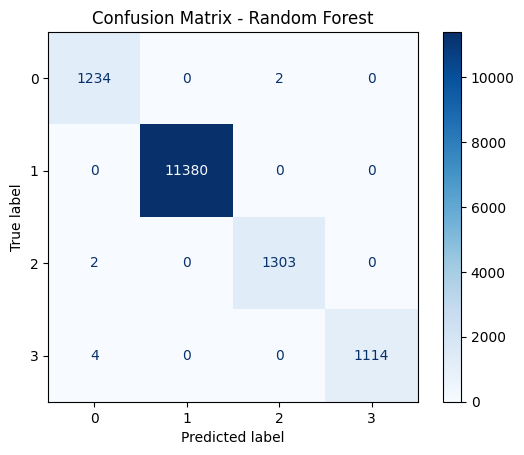

In [17]:
# confusion matrix model Random Forest
cm_rf_model = confusion_matrix(y_test_rf, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model)
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [18]:
# Evaluasi model XGBoost
y_pred_xgb = xgb_model.predict(X_test_xgb)
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
report_xgb = classification_report(y_test_xgb, y_pred_xgb)

print("Akurasi XGBoost:", accuracy_xgb)
print("Laporan Klasifikasi:\n", report_xgb)

Akurasi XGBoost: 0.9995345435201809
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00     11380
           2       1.00      1.00      1.00      1305
           3       1.00      1.00      1.00      1118

    accuracy                           1.00     15039
   macro avg       1.00      1.00      1.00     15039
weighted avg       1.00      1.00      1.00     15039



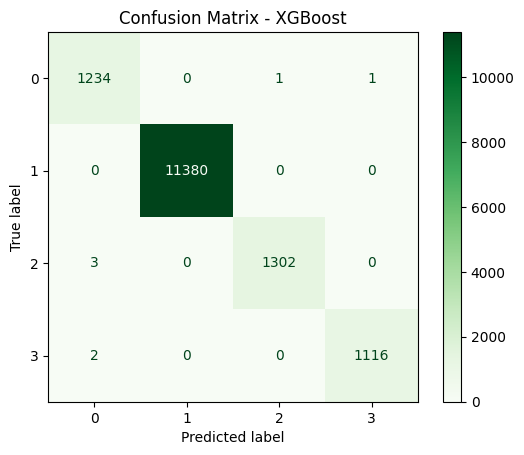

In [19]:
# confusion matrix model XGBoost
cm_xgb_model = confusion_matrix(y_test_xgb, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_model)
disp_xgb.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [20]:
# Calculate classification reports for both models
rf_report = classification_report(y_test_rf, y_pred_rf, digits=5, output_dict=True)
xgb_report = classification_report(y_test_xgb, y_pred_xgb, digits=5, output_dict=True)

# Extract relevant metrics (accuracy, precision, recall, F1 score)
metrics = {
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [rf_report['accuracy'], xgb_report['accuracy']],
    'Precision': [rf_report['weighted avg']['precision'], xgb_report['weighted avg']['precision']],
    'Recall': [rf_report['weighted avg']['recall'], xgb_report['weighted avg']['recall']],
    'F1-Score': [rf_report['weighted avg']['f1-score'], xgb_report['weighted avg']['f1-score']]
}


df = pd.DataFrame(metrics)
df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.999468,0.999469,0.999468,0.999468
1,XGBoost,0.999535,0.999535,0.999535,0.999535


## **C. Analisis Hasil Evaluasi Model Klasifikasi**

**Analisis Hasil Evaluasi Model Klasifikasi: Random Forest vs XGBoost**


Setelah melakukan pelatihan dan pengujian model klasifikasi dengan menggunakan dua algoritma yang berbeda, yaitu Random Forest dan XGBoost, langkah selanjutnya adalah menyimpulkan hasil dari evaluasi performa masing-masing model. Evaluasi dilakukan menggunakan metrik Accuracy, Classification Report, serta Confusion Matrix.

**1. Evaluasi Random Forest**

Akurasi: Tinggi.

Interpretasi dari model Random Forest:

- Untuk label 0, memiliki 2 kesalahan (ke kelas 2).
- Untuk  label 1, dapat di klasifikasi dengan benar seluruhnya (11307 benar dari 11307).
- Untuk label 2 memiliki 2 kesalahan(ke kelas 1).
- Untuk label 3 memiliki 4 kesalahan(ke kelas 1).


**2. Evaluasi XGBoost**

Akurasi: Sangat tinggi

Interpretasi:

- Label 0 memiliki 2 kesalahan (pada kelas 3 dan 4).
- Label 1 diklasifikasi dengan benar seluruhnya, sama seperti Random Forest
- Label 2 memiliki 3 kesalahan (pada kelas 1).
- Label 3 memiliki 2 kesalahan (pada).



Perbandingan Singkat antara 2 model:

- Dari segi akurasi, XGBoost memiliki nilai akurasi yang lebih tinggi dari Random Forest.
- Dari segi kesalahan, XGBoost juga mampu menghasilkan prediksi yang lebih tepat dengan jumlah kesalahan yang lebih sedikit dibanding Random Forest.
- Dari segi presisi & recall, kedua model memiliki keunggulan yang sama atau perbedaan yang sangat tipis.
- Dari segi kecepatan pelatihan, Random Forest lebih cepat karena tidak melalui proses boosting berulang seperti XGBoost.


**Kesimpulan:**
Kedua algoritma menunjukkan performa yang sangat baik dalam mengklasifikasikan data hasil clustering. Namun, XGBoost mampu memberikan hasil yang lebih optimal dibandingkan Random Forest. Dengan demikian, model XGBoost dipilih sebagai algoritma klasifikasi terbaik untuk dataset ini.